In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm

# Task \#1

In [2]:
data = np.genfromtxt('output/N_vs_v0.txt')

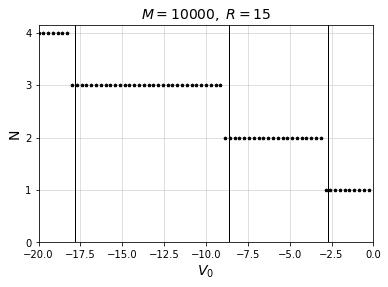

In [3]:
plt.plot(data[:, 0], data[:, 1], linestyle='', marker='p', color='black', ms=3)
plt.axvline(x=-2.684, color='black', linestyle='-', linewidth=1)
plt.axvline(x=-8.650, color='black', linestyle='-', linewidth=1)
plt.axvline(x=-17.796, color='black', linestyle='-', linewidth=1)


plt.xlabel(r'$V_0$', fontsize=14)
plt.ylabel('N', fontsize=14)

plt.title(r'$M=10000,\; R=15$', fontsize=14)

plt.yticks([0,1,2,3,4])
plt.xlim(data[-1, 0], 0)

plt.grid(alpha=0.5)

plt.savefig('figures/num_eigen_vs_v0.pdf')

# Task \#2

In [4]:
t_vs_m = np.genfromtxt('output/T_vs_M.txt')

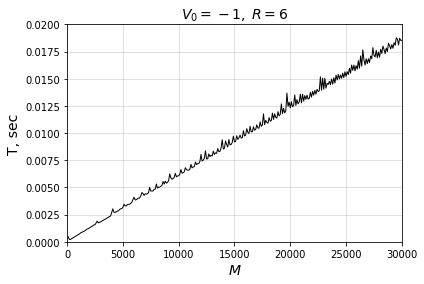

In [5]:
plt.plot(t_vs_m[:, 0], t_vs_m[:, 1], color='black', linewidth=1)

plt.xlabel(r'$M$', fontsize=14)
plt.ylabel('T, sec', fontsize=14)

plt.title(r'$V_0=-1,\; R=6$', fontsize=14)

# plt.yticks([0,1,2,3,4])
plt.xlim(0, t_vs_m[-1, 0])
plt.ylim(0, 0.02)

plt.grid(alpha=0.5)

plt.savefig('figures/T_vs_M.pdf', bbox_inches='tight')

# Task \#3

## One level

In [21]:
e1 = np.genfromtxt('output/e1_-.txt')
r = np.genfromtxt('output/r_-.txt')
m = np.genfromtxt('output/m_-.txt')

### Presiciest Value of Energy

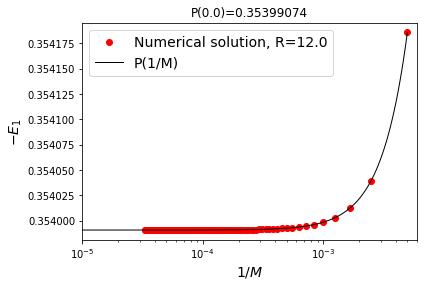

In [22]:
plt.scatter(1/m, abs(e1[-1,:]), color='red', label=f'Numerical solution, R={r[-1]}')
# plt.scatter(1/m, abs(e1[-70,:]), color='green', label=f'Numerical solution, R={r[-70]}')

p = np.poly1d(np.polyfit(1/m, abs(e1[-1,:]), 2))

d = np.linspace(0,5e-3)
plt.plot(d, p(d), color='black', linewidth=1, label='P(1/M)')

plt.xlabel(r'$1/M$', fontsize=14)
plt.ylabel(r'$-E_1$', fontsize=14)

plt.xscale('log')

plt.xlim(1e-5,6e-3)
# plt.ylim(0.35395,0.3542)

plt.legend(fontsize=14)

plt.title(f'P(0.0)={p(0.0):.8}')

e1_pres = -p(0.0)

In [23]:
e1_pres = np.zeros(len(e1))
for i in range(len(e1)):
    p = np.poly1d(np.polyfit(1/m, abs(e1[i,:]), 2))
    e1_pres[i] = -p(0.0)

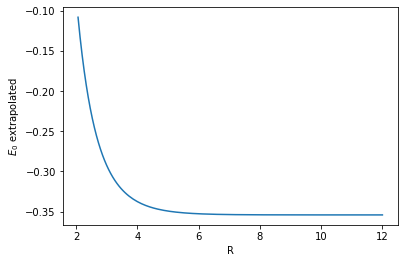

In [24]:
plt.plot(r, e1_pres)
plt.xlabel('R')
plt.ylabel(r'$E_0$ extrapolated')
plt.savefig('figures/E0_extrapolated.pdf', bbox_inches='tight')

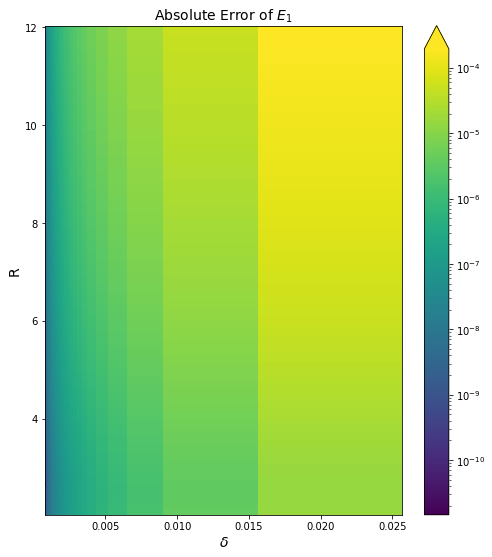

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(8,9))

z = np.abs([e1[i,:]-e1_pres[i] for i in range(len(e1))])

pcm = ax.pcolormesh(2*r/m, r, z,
                    norm=colors.LogNorm(vmin=z.min(),
                                        vmax=z.max()),
                    )

fig.colorbar(pcm, ax=ax, extend='max')

ax.set_xlabel(r'$\delta$', fontsize=14)
ax.set_ylabel('R', fontsize=14)

ax.set_title(r'Absolute Error of $E_1$', fontsize=14)

fig.savefig('figures/abserr.pdf')

## Two levels

In [12]:
e1 = np.genfromtxt('output/e1_1.txt')
e2 = np.genfromtxt('output/e2_1.txt')
r = np.genfromtxt('output/r_1.txt')
m = np.genfromtxt('output/m_1.txt')

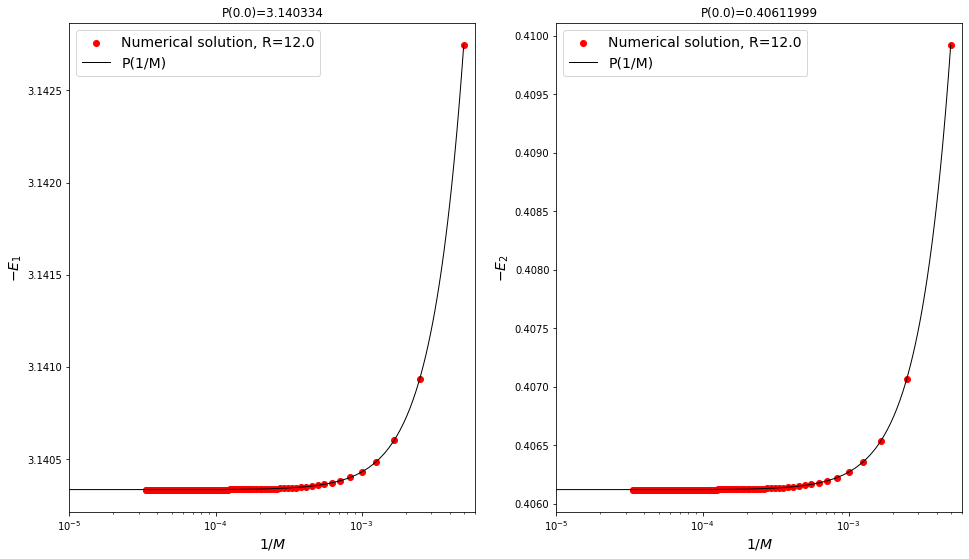

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(16,9))

ax[0].scatter(1/m, abs(e1[-1,:]), color='red', label=f'Numerical solution, R={r[-1]}')

p = np.poly1d(np.polyfit(1/m, abs(e1[-1,:]), 2))

d = np.linspace(0,5e-3)
ax[0].plot(d, p(d), color='black', linewidth=1, label='P(1/M)')

ax[0].set_xlabel(r'$1/M$', fontsize=14)
ax[0].set_ylabel(r'$-E_1$', fontsize=14)

ax[0].set_xscale('log')

ax[0].set_xlim(1e-5,6e-3)
# ax[0].set_ylim(0.35395,0.3542)

ax[0].legend(fontsize=14)

ax[0].set_title(f'P(0.0)={p(0.0):.8}')

e1_pres = -p(0.0)

ax[1].scatter(1/m, abs(e2[-1,:]), color='red', label=f'Numerical solution, R={r[-1]}')

p = np.poly1d(np.polyfit(1/m, abs(e2[-1,:]), 2))

d = np.linspace(0,5e-3)
ax[1].plot(d, p(d), color='black', linewidth=1, label='P(1/M)')

ax[1].set_xlabel(r'$1/M$', fontsize=14)
ax[1].set_ylabel(r'$-E_2$', fontsize=14)

ax[1].set_xscale('log')

ax[1].set_xlim(1e-5,6e-3)
# ax[1].set_ylim(0.35395,0.3542)

ax[1].legend(fontsize=14)

ax[1].set_title(f'P(0.0)={p(0.0):.8}')

e2_pres = -p(0.0)

In [13]:
e1_pres = np.zeros(len(e1))
for i in range(len(e1)):
    p = np.poly1d(np.polyfit(1/m, abs(e1[i,:]), 2))
    e1_pres[i] = -p(0.0)
    
e2_pres = np.zeros(len(e1))
for i in range(len(e1)):
    p = np.poly1d(np.polyfit(1/m, abs(e2[i,:]), 2))
    e2_pres[i] = -p(0.0)

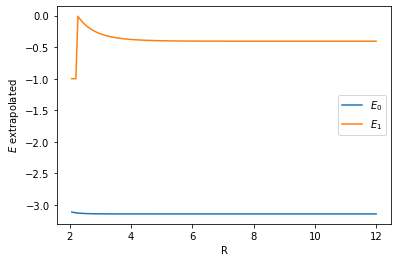

In [17]:
plt.plot(r, e1_pres, label=r'$E_0$')
plt.plot(r, e2_pres, label=r'$E_1$')
plt.legend()
plt.xlabel('R')
plt.ylabel(r'$E$ extrapolated')
plt.savefig('figures/Es_extrapolated.png', bbox_inches='tight', dpi=300)

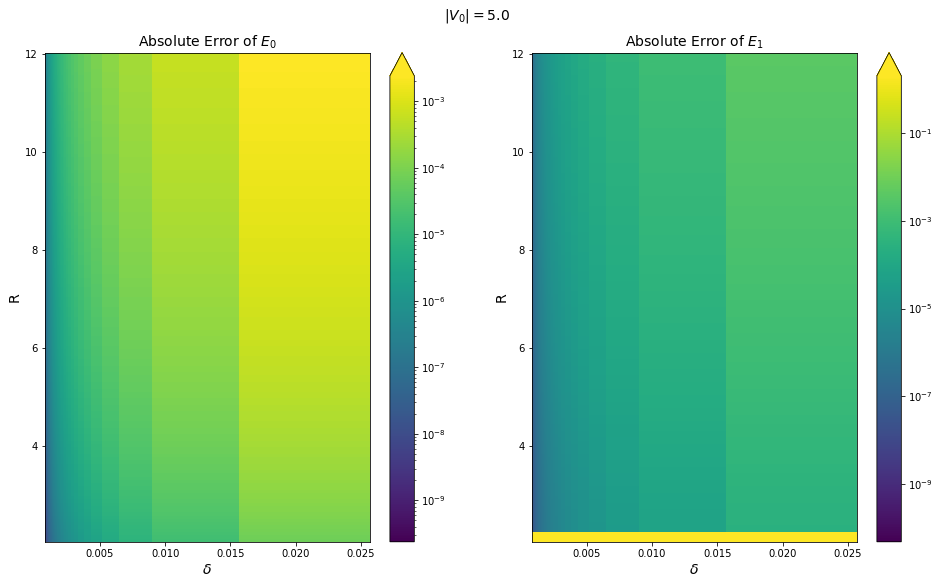

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(16,9))

err1 = [e1[i,:]-e1_pres[i] for i in range(len(e1))]
err2 = [e2[i,:]-e2_pres[i] for i in range(len(e2))]

pcm = ax[0].pcolormesh(2*r/m, r, np.abs(err1), norm=colors.LogNorm(vmin=np.abs(err1).min(),
                                                          vmax=np.abs(err1).max()),
                    )

fig.colorbar(pcm, ax=ax[0], extend='max')

ax[0].set_xlabel(r'$\delta$', fontsize=14)
ax[0].set_ylabel('R', fontsize=14)

ax[0].set_title(r'Absolute Error of $E_0$', fontsize=14)

pcm = ax[1].pcolormesh(2*r/m, r, np.abs(err2), norm=colors.LogNorm(vmin=np.abs(err2).min(),
                                                          vmax=np.abs(err2).max()),
                    )

fig.colorbar(pcm, ax=ax[1], extend='max')

ax[1].set_xlabel(r'$\delta$', fontsize=14)
ax[1].set_ylabel('R', fontsize=14)

ax[1].set_title(r'Absolute Error of $E_1$', fontsize=14)

fig.suptitle(r'$|V_0| = 5.0$', fontsize=14, y=0.95)

fig.savefig('figures/abserr_v0_5.pdf')